# Thống kê máy tính và ứng dụng (Computational Statistics and Applications)

## Thông tin sinh viên : 
- **Họ và tên :** Trình Cao An  
- **MSSV:** 22127004  

## Các thư viên cần thiết

In [1]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import norm

## Câu 1a: 

**Sử dụng hàm `random.sample`**

In [2]:
def gen_4() :
    return random.sample(range(1, 51), k = 4)
gen_4() 

[1, 42, 24, 11]

Text(0.5, 1.0, 'Biểu đồ histogram của các số được chọn ngẫu nhiên')

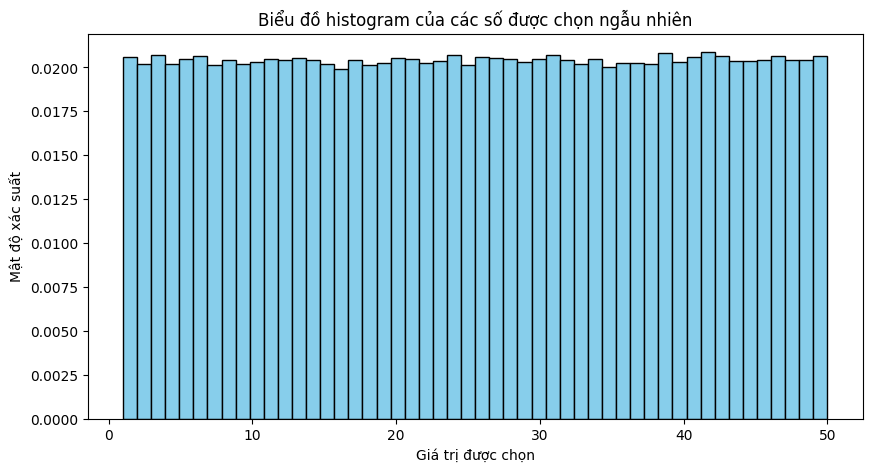

In [3]:
N = 100_000
# Danh sách chứa tất cả các số được chọn
X = []

# Sinh dữ liệu ngẫu nhiên
for _ in range(N):
    X.extend(gen_4())

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 5))
plt.hist(X, bins=50, density=True, color="skyblue", edgecolor="black")
plt.xlabel("Giá trị được chọn")
plt.ylabel("Mật độ xác suất")
plt.title("Biểu đồ histogram của các số được chọn ngẫu nhiên")

## Câu 1b:
### Trình bày thuật toán :
1. Ta sẽ chọn ngẫu nhiên 3 phần tử trong $C$.  
2. Ta sẽ chọn 1 phần từ ngẫu nhiên từ 47 phần tử còn lại.

In [4]:
def gen_4b() :
    C = list(range(1, 6)) 
    S_rest = list(range(6, 51))
    X = random.sample(C, k = 3)
    C_rest = list(set(C) - set(X))
    X.append(random.sample(S_rest + C_rest, k = 1)[0])
    return X

gen_4b()

[1, 5, 2, 26]

Gọi $A$ là tập được sinh ra theo câu b. Ta có :
$$P(A \in C) = \frac{|C'|}{|C'| + |S - C|} = \frac{2}{47} \approx 0.0426$$

In [5]:
N = 100_000
X = [set(gen_4b()) <= {1, 2, 3, 4, 5} for _ in range(N)]
sum(X)/len(X)

0.04311

## Câu 2a :
Cho hàm mật độ :   
$$f(x) = \frac{1}{2}e^{-|x|}$$
Với hàm phân phối $F(x)$ được tính theo trường hợp $x < 0$ và $x \geq 0$.  
Áp dụng biến đổi ngược ta có công thức : 
$$\Rarr x = \begin{cases}
x = \ln{2U} &, U < 1/2 \\
x = -\ln{2(1 - U)} &, U \geq 1/2
\end{cases}$$

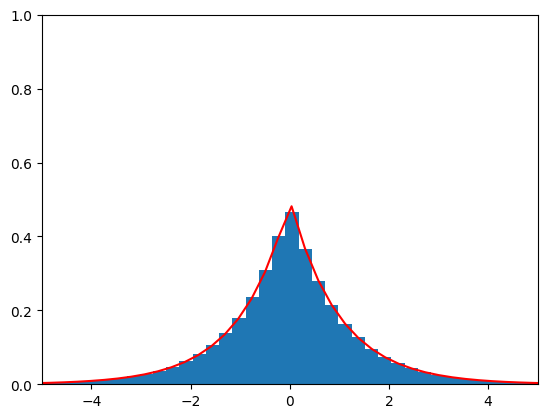

In [6]:
def gen_2a() :
    U = random.uniform(0, 1)
    if U < 1/2 :
        return -np.log(2 * U)
    else :
        return np.log(2 * (1 - U))

N = 1000_000
x = [gen_2a() for _ in range (N)]
t = np.linspace(np.min(x), np.max(x), num=100)
plt.hist(x, bins = 100, density= True)
plt.xlim(-5, 5)
plt.ylim(0, 1)
plt.plot(t, 1/2 * np.exp(-abs(t)), "red")
plt.show()

## Câu 2b :
Cho hàm mật độ :
$$f(x) = \frac{5}{2}e^{-\frac{5}{2}{(x - 2)}}$$
với $x \geq 2$.  
Phân phối tích lũy là : 
$$F(x) = \int_{2}^{x}\frac{5}{2}e^{-\frac{5}{2}{(t - 2)}}dt = 1 - e^{-\frac{5}{2}{(x - 2)}}$$
Suy ra công thức biến đổi ngược : 
$$x = 2 - \frac{2}{5}\ln(1 - U)$$

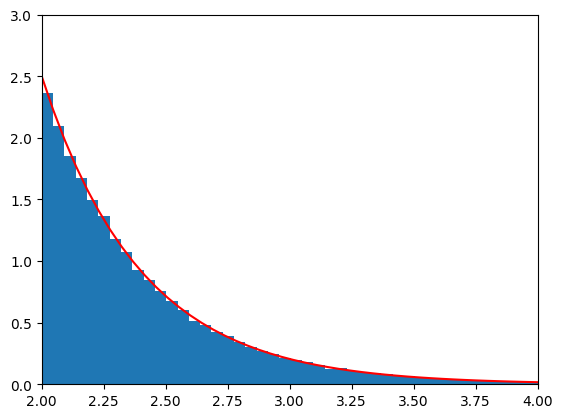

In [7]:
def gen_2b() :
    U = random.uniform(0, 1)
    return 2 - 2/5 * np.log(1 - U)
N = 100_000
x = [gen_2b() for _ in range(N)]
t = np.linspace(np.min(x), np.max(x), num=100)
plt.hist(x, bins=100, density=True)
plt.xlim(2, 4)
plt.ylim(0, 3)
plt.plot(t, 5/2 * np.exp(-5/2 * (t - 2)), "red")
plt.show()

## Câu 2c :
Cho hàm mật độ :
$$f(x) = 
\begin{cases}
x, & 0 \le x \le 1, \\
1, & 1 < x \le \frac{3}{2}, \\
0, & \text{khác}.
\end{cases}$$
Tính hàm phân phối tích lũy $F(x)$ theo các khoảng và giải được công thức biến đổi ngược : 
$$x = \begin{cases}\sqrt{2U}, & 0 \leq U \leq \frac{1}{2} \\
U + \frac{1}{2}, & \frac{1}{2} \leq U \leq 1
\end{cases}$$

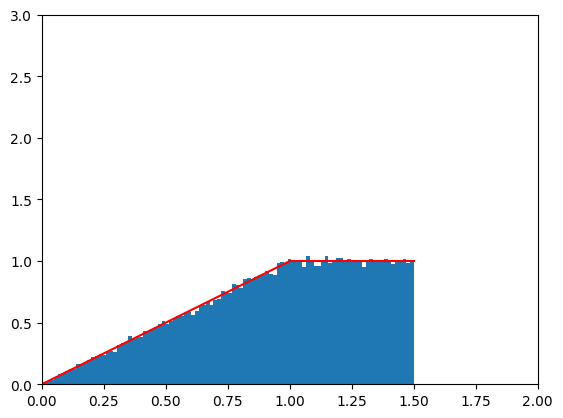

In [8]:
def gen_2c() :
    U = random.uniform(0, 1)
    if U <= 1/2 :
        return np.sqrt(2 * U)
    else :
        return U + 1/2

N = 100_000
x = [gen_2c() for _ in range(N)]
t1 = np.linspace(np.min(x), 1, num=100)
t2 = np.linspace(1, np.max(x), num=100)
plt.hist(x, bins=100, density=True)
plt.xlim(0, 2)
plt.ylim(0, 3)
plt.plot(t1, t1 , "red")
plt.plot(t2, np.ones_like(t2), "red")
plt.show()

## Câu 2d :
Cho hàm mật độ :
$$f(x) = \frac{1}{\pi(1 + x^2)}$$
với hàm phân phối tích lũy là :
$$F(x) = \frac{1}{\pi}\arctan{x}$$
Đặt $U = F(x)$ ta công thức biến đổi ngược là :
$$x = \tan(\pi U)$$

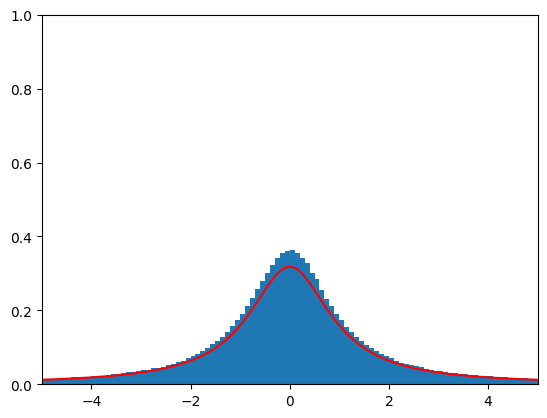

In [17]:
def gen_2d() :
    U = random.uniform(0, 1)
    return np.tan(np.pi * U)
N = 1000_000
x = [gen_2d() for _ in range(N)]
x_new = [xi for xi in x if -5 <= xi <= 5]
t = np.linspace(-5, 5, num=100)

plt.hist(x_new, bins=100, density=True)
plt.xlim(-5, 5)
plt.ylim(0, 1)
plt.plot(t, 1/(np.pi * (1 + t**2)), "red")
plt.show()

## Câu 3a :
Tích phân cần ước lượng :
$$I = \int_{-\infty}^{\infty}e^{-x^2}|\sin{x}|dx = \sqrt{\pi}E(|\sin x|)$$
Với $X$ là biến ngẫu nhiên có hàm mật độ $f(x) = \frac{1}{\pi}e^{-x^2}$  
**Quy trình ước lượng :**
1. Sinh $N$ mẫu theo phân phối $\frac{1}{\pi}e^{-x^2}$
2. Tính $|\sin x_i|$ cho từng mẫu $i$
3. Tính trung bình :
$$\bar{g} = \frac{1}{N} \sum^N_{i = 1}|\sin x|$$
1. Xấp xỉ giá trị tích phân :
   $$\hat{i} = \sqrt{\pi}\bar{g}$$
2. Ước lượng khoảng tin cậy $96\%$
   $$\bar{g} \pm \Phi^{-1}{(0.98)}\frac{s_g}{\sqrt{N}}$$


In [10]:
N = 100_000  
sigma = 1.0 / np.sqrt(2.0)

# 1. Sinh mẫu
x_samples = np.random.normal(0, sigma, size=N)

# 2. Tính giá trị |sin x_i|
sin_values = np.abs(np.sin(x_samples))

# 3. Trung bình
g_bar = np.mean(sin_values)

# 4. Xấp xỉ tích phân
I_hat = np.sqrt(np.pi) * g_bar

# 5. Ước lượng độ lệch chuẩn
s_g = np.std(sin_values, ddof=1)  # độ lệch chuẩn mẫu
# Độ lệch chuẩn của trung bình mẫu
s_g_bar = s_g / np.sqrt(N)

# 6. Khoảng tin cậy 96%
phi = norm.ppf(0.98)
I_lower = np.sqrt(np.pi) * (g_bar - phi * s_g_bar)
I_upper = np.sqrt(np.pi) * (g_bar + phi * s_g_bar)

print("Kết quả xấp xỉ I =", I_hat)
print(f"Khoảng tin cậy 96%: [{I_lower}, {I_upper}]")

Kết quả xấp xỉ I = 0.8484015086560814
Khoảng tin cậy 96%: [0.8450121632265487, 0.8517908540856141]


**Kết quả trên [Wolframalpha](https://www.wolframalpha.com/):**
$$ I = \int_{-\infty}^{\infty}e^{-x^2}|\sin{x}|dx \approx 0.848877$$

## Câu 3b :
Ta có tích phân sau : 
$$J = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-\frac{1}{2}\left(x^2 + (y - 1)^2 - \frac{x(y - 1)}{4}\right)}dxdy$$
**Đặt $Y = y - 1$**  
Như vậy tích phân sẽ trở thành :
$$J = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-\frac{1}{2}\left(x^2 + Y^2 - \frac{xY}{4}\right)}dxdY$$
Ta có phân phối chuẩn 2D cho $x, Y$ với hàm mật độ sau :
$$p(x, Y) = \frac{1}{2\pi}e^{-\frac{1}{2}(x^2 + Y^2)}$$
Như vậy ta có thể viết :
$$J = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\frac{e^{-\frac{1}{2}\left(x^2 + Y^2 - \frac{xY}{4}\right)}}{p(x, Y)}p(x, Y)dxdY = E_{(x, y) \sim p}(w(x,Y))$$
Ta có :
$$w(x, Y) = \frac{e^{-\frac{1}{2}\left(x^2 + Y^2 - \frac{xY}{4}\right)}}{p(x, Y)} = 2\pi e^{\frac{xY}{8}}$$


In [11]:


N = 100_000  # Chọn lớn để giảm sai số
x_samples = np.random.normal(0, 1, N)
Y_samples = np.random.normal(0, 1, N)

# Tính trọng số w_i = 2*pi * exp(x_i * Y_i / 8)
w_values = 2 * np.pi * np.exp(x_samples * Y_samples / 8.0)

# Trung bình
J_est = np.mean(w_values)

# Độ lệch chuẩn mẫu của w_i
s_w = np.std(w_values, ddof=1)

# Sai số chuẩn của trung bình
se = s_w / np.sqrt(N)

# z_96 ~ 2.054 (khoảng tin cậy 96%)
phi = norm.ppf(0.98)
lower = J_est - phi * se
upper = J_est + phi * se

print("J =", J_est)
print(f"Khoảng tin cậy 96% ~ [{lower}, {upper}]")

J = 6.33128948454833
Khoảng tin cậy 96% ~ [6.326008145339343, 6.3365708237573175]


**Kết quả trên [Wolframalpha](https://www.wolframalpha.com/):**
$$J = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-\frac{1}{2}\left(x^2 + (y - 1)^2 - \frac{x(y - 1)}{4}\right)}dxdy \approx 6.33286$$

## Câu 4a :
Sinh $N$ mẫu từ $N(0, 1)$, sau đó kiểm tra điều kiện $0 < x < 1$.  
Ước lượng xác suất là tỷ lệ số mẫu thoả mãn điều kiện. Sai số chuẩn được tính theo công thức cho biến Bernoulli:
$$SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{N}}$$

In [12]:
def gen_4a() :
    return np.random.normal(0, 1)
N = 250_000
x = []
for _ in range(N):
    val = gen_4a()  
    x.append((val > 0) and (val < 1))
p_hat = sum(x)/N
SE = np.sqrt(p_hat*(1 - p_hat)/N)
print("P(0 < X < 1) ~ ", p_hat)
print("SE : ", SE)

P(0 < X < 1) ~  0.34172
SE :  0.0009485724887429532


## Câu 4b :
**Sử dụng phương pháp lấy mẫu quan trọng**  
Ở vùng cực hiếm $(10, 11)$ với $X \sim N(0, 1)$, mẫu lấy trực tiếp sẽ không hiệu quả. Ta dùng importance sampling với phân phối $U(10, 11)$.  
Với $g(x) = 1$ trên $[10, 11]$, trọng số là : 
$$w(x) = \frac{f(x)}{g(x)} = \frac{1}{2\pi}e^{-\frac{x^2}{2}}$$
Sau đó ước lượng $P(10 < X < 11) = E_g(w(x))$.

In [13]:
N = 100_000
x = np.random.uniform(10, 11, N)
weight = 1/(np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
P = np.mean(weight)
# Ước lượng sai số chuẩn của ước lượng
SE = np.std(weight, ddof=1) / np.sqrt(N)
print("P(10 < X < 11) ~ ", P)
print("Standard Error = ", SE)

P(10 < X < 11) ~  7.655638014101285e-24
Standard Error =  4.877420600559012e-26


## Câu 4c :
**Sử dụng phương pháp lấy mẫu quan trọng**
$$P(X < 10.5 | 10 < X < 11) = \frac{P(10 < X < 10.5)}{P(10 < X < 11)}$$
$$P(10 < X < 10.5) = \frac{1}{N} \sum_{i = 1}^{N}I(x_i < 10.5)w(x_i)$$
Lấy mẫu từ phân phối $g(x) = N(10.5, 0.5^2)$ và chỉ giữ các mẫu nằm trong $[10,11]$.  
- Tử số : $P_{numer} = \frac{1}{N_{eff}}\sum_{i = 1}^{N_{eff}}w(x_i)I(x_i < 10.5)$.
- Mẫu số : $P_{total} =  \frac{1}{N_{eff}}\sum_{i = 1}^{N_{eff}}w(x_i)$.
Ước lượng điệu kiện là tỉ số $R = \frac{P_{numer}}{P_{total}}$.  
Để tính sai số chuẩn cho $R$ ta dùng phương pháp delta:
$$SE(R) = \sqrt{{\frac{1}{N_{eff}}}\left(\frac{var(wI)}{P^2_{total}} + \frac{P^2_{numer}var(w)}{P^4_{total}} - 2\frac{P_{numer}Cov(wI,I)}{P^3_{total}}\right)}$$

In [14]:


N = 10_000
# Sinh mẫu từ phân phối chuẩn với mean = 10.5, std = 0.5
x = np.random.normal(10.5, 0.5, N)

# Giữ các mẫu x trong [10, 11]
mask = (x >= 10) & (x <= 11)
x = x[mask]
N_eff = len(x)

# Hàm mật độ chuẩn của N(0,1)
f = lambda x: 1 / np.sqrt(2 * np.pi) * np.exp(-(x**2) / 2)
# Mật độ của g(x): N(10.5, 0.5^2)
g = lambda x: 1 / (0.5 * np.sqrt(2 * np.pi)) * np.exp(-((x - 10.5) ** 2) / (2 * 0.5**2))

# Trọng số: w(x)= f(x)/g(x)
weight = f(x) / g(x)

# Ước lượng P(10<X<11) theo importance sampling trên g
P_total = np.mean(weight)

# Ước lượng P(10<X<10.5): chỉ lấy mẫu có x < 10.5
I = (x < 10.5).astype(float)
P_numer = np.mean(weight * I)

# Ước lượng xác suất điều kiện
cond_est = P_numer / P_total

# Tính các mảng cần thiết
wI = weight * I  # mảng của w(x)*I(x<10.5)

# Ước lượng phương sai (sử dụng ddof=1 để lấy mẫu không thiên)
var_wI = np.var(wI, ddof=1)
var_w = np.var(weight, ddof=1)
cov_wI_w = np.cov(wI, weight, ddof=1)[0, 1]

# Áp dụng công thức delta method:
SE_delta = np.sqrt(
    (
        var_wI / (P_total**2)
        + (P_numer**2 * var_w) / (P_total**4)
        - 2 * P_numer * cov_wI_w / (P_total**3)
    )
    / N_eff
)

print("Conditional probability =", cond_est)
print("Estimated SE (delta method) =", SE_delta)

Conditional probability = 0.9941787632252076
Estimated SE (delta method) = 0.00023413900991411235


## Câu 4d :
$$E(X | 10 < X < 11) = \frac{\int_{10}^{11}xf(x)dx}{\int_{10}^{11}f(x)dx}$$
Trong đó $f(x) = \frac{1}{2\pi}e^{-\frac{x^2}{2}}$.  
Với importance sampling, ta ước lượng :
- Tử số : $A = \frac{1}{N_{eff}}\sum_{i = 1}^{N_{eff}}x_iw(x_i)$.
- Mẫu số : $B = \frac{1}{N_{eff}}\sum_{i = 1}^{N_{eff}}w(x_i)$.
Ước lượng kỳ vọng có điều kiện là $A/B$.  
Sai số chuẩn $SE$ được xấp xỉ bằng phương pháp delta : 
$$SE \approx \sqrt{{\frac{1}{N_{eff}}}\left(\frac{var(xw)}{B^2} + \frac{A^2var(w)}{B^4} - 2\frac{ACov(xw,w)}{B^3}\right)}$$

In [15]:

# Số mẫu ban đầu lớn để đảm bảo đủ mẫu nằm trong [10,11]
N = 100_000

# Sinh mẫu từ phân phối chuẩn N(10.5, 0.5^2)
x = np.random.normal(10.5, 0.5, N)

# Chỉ giữ lại các mẫu nằm trong [10,11]
mask = (x >= 10) & (x <= 11)
x = x[mask]
N_eff = len(x)

# Hàm mật độ của chuẩn N(0,1)
f = lambda x: 1 / np.sqrt(2 * np.pi) * np.exp(-(x**2) / 2)
# Hàm mật độ của g(x): phân phối N(10.5, 0.5^2)
g = lambda x: 1 / (0.5 * np.sqrt(2 * np.pi)) * np.exp(-((x - 10.5) ** 2) / (2 * 0.5**2))

# Trọng số w(x)= f(x)/g(x)
weight = f(x) / g(x)

# Ước lượng tử số: trung bình mẫu của x_i * w(x_i)
A_hat = np.mean(x * weight)
# Ước lượng mẫu số: trung bình mẫu của w(x)
B_hat = np.mean(weight)

# Ước lượng E[X | 10 < X < 11]
E_cond = A_hat / B_hat

# Tính các mảng cần thiết
xw = x * weight  # mảng của x_i * w(x_i)
w_arr = weight  # mảng của w(x_i)

# Ước lượng phương sai của xw và w_arr (sử dụng ddof=1 để lấy mẫu không thiên)
var_xw = np.var(xw, ddof=1)
var_w = np.var(w_arr, ddof=1)
# Ước lượng hiệp phương sai giữa xw và w_arr
cov_xw_w = np.cov(xw, w_arr, ddof=1)[0, 1]

# Áp dụng công thức delta method:
SE_delta = np.sqrt(
    (
        var_xw / (B_hat**2)
        + (A_hat**2 * var_w) / (B_hat**4)
        - 2 * A_hat * cov_xw_w / (B_hat**3)
    )
    / N_eff
)

print("E(X | 10 < X < 11) =", E_cond)
print("Estimated SE (delta method) =", SE_delta)

E(X | 10 < X < 11) = 10.098630486415285
Estimated SE (delta method) = 0.0006856993896227776
